# **IML Project: Sign Language Digits Recognition(41)**

### **Project Description**

The dataset contains images of hands representing digits from 0 to 9.The dataset is split into train and test sets. The task is to recognise the number being represented.

*   Professor: Avinash Sharma
*   Mentor: Alli Khadga Jyoth



Team Members:-


*   Yogesh Jajoria(B22ME073)
*   Rahul Garg(B22CH025)


*   Sahil Bhaskar(B22CH052)
*   Ghanshyam(B22PH009)


*   Abhishek Kumar(B22CH001)







### **Mounting Drive**

Connecting to Data

In [ ]:
from google.colab import drive                #initiates a process that allows us to mount your Google Drive into the Colab environment
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Importing Necessary library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

## **Loading Data**

Checking Class Labels present in the dataset

In [ ]:
path_train = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/train'      #path of train directory
print('CLasses present in the Data:- ')
for image_class in os.listdir(path_train):                             # returns a list of items (files and directories) contained within the specified directory
  print(image_class)

CLasses present in the Data:- 
9
8
3
2
1
0
7
6
5
4


Visualizing Images of Train set and Test set for number 0

List Of Images:  ['IMG_1239.JPG', 'IMG_1219.JPG', 'IMG_1209.JPG', 'IMG_1229.JPG', 'IMG_1148.JPG', 'IMG_1169.JPG', 'IMG_1189.JPG', 'IMG_1179.JPG', 'IMG_1199.JPG', 'IMG_1138.JPG', 'IMG_1128.JPG', 'IMG_1118.JPG', 'IMG_4233.JPG', 'IMG_4223.JPG', 'IMG_4276.JPG', 'IMG_4296.JPG', 'IMG_4213.JPG', 'IMG_4203.JPG', 'IMG_4286.JPG', 'IMG_4243.JPG', 'IMG_4193.JPG', 'IMG_4181.JPG', 'IMG_4159.JPG', 'IMG_4149.JPG', 'IMG_4170.JPG', 'IMG_4079.JPG', 'IMG_4089.JPG', 'IMG_4119.JPG', 'IMG_4109.JPG', 'IMG_4139.JPG', 'IMG_4049.JPG', 'IMG_4059.JPG', 'IMG_4040.JPG', 'IMG_4069.JPG', 'IMG_1312.JPG', 'IMG_1270.JPG', 'IMG_1290.JPG', 'IMG_1301.JPG', 'IMG_1260.JPG', 'IMG_1322.JPG', 'IMG_1249.JPG', 'IMG_4614.JPG', 'IMG_4564.JPG', 'IMG_4506.JPG', 'IMG_4533.JPG', 'IMG_4543.JPG', 'IMG_4554.JPG', 'IMG_4486.JPG', 'IMG_4466.JPG', 'IMG_4456.JPG', 'IMG_4446.JPG', 'IMG_4496.JPG', 'IMG_4435.JPG', 'IMG_4413.JPG', 'IMG_4423.JPG', 'IMG_4403.JPG', 'IMG_4391.JPG', 'IMG_4327.JPG', 'IMG_4370.JPG', 'IMG_4338.JPG', 'IMG_4348.JPG', 'IMG_4

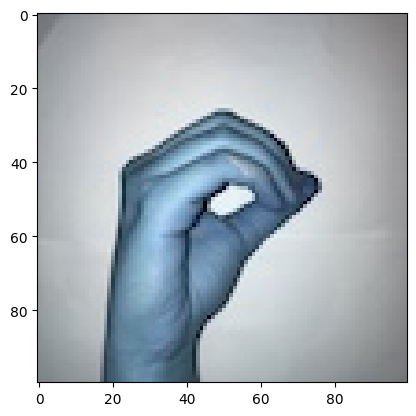

In [ ]:
path_train_0 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/train/0'   #path of folder

images_train_0 = os.listdir(path_train_0)                             #create list on image files
print("List Of Images: ",images_train_0)
print('Number of Images in Train set 0: ',len(images_train_0))

imgdata_train_0 = []                                                  #Empty list to store image data(RGB format)

for img in images_train_0:
  imgarr_train_0 = cv2.imread(os.path.join(path_train_0,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_train_0)                                          #Display Images
  imgdata_train_0.append(imgarr_train_0)

print("Shape of the Images in Train set 0: ",imgarr_train_0.shape)     #(height, width, channels)

List Of Images:  ['IMG_5517.JPG', 'IMG_5655.JPG', 'IMG_4776.JPG', 'IMG_4099.JPG', 'IMG_5276.JPG', 'IMG_4359.JPG', 'IMG_1280.JPG', 'IMG_4807.JPG', 'IMG_4674.JPG', 'IMG_5960.JPG', 'IMG_4926.JPG', 'IMG_4896.JPG', 'IMG_5476.JPG', 'IMG_5685.JPG', 'IMG_4916.JPG', 'IMG_4129.JPG', 'IMG_5847.JPG', 'IMG_5625.JPG', 'IMG_4644.JPG', 'IMG_1158.JPG', 'IMG_4684.JPG', 'IMG_5380.JPG', 'IMG_4254.JPG', 'IMG_5412.JPG', 'IMG_5887.JPG', 'IMG_5635.JPG', 'IMG_5756.JPG', 'IMG_5716.JPG', 'IMG_5562.JPG', 'IMG_4735.JPG', 'IMG_4476.JPG', 'IMG_4786.JPG', 'IMG_5203.JPG', 'IMG_4826.JPG', 'IMG_5726.JPG', 'IMG_5456.JPG', 'IMG_4266.JPG', 'IMG_4876.JPG', 'IMG_5074.JPG', 'IMG_4976.JPG', 'IMG_5816.JPG']
Number of Images in Test set 0:  41
Shape of the Images in Test set 0:  (100, 100, 3)


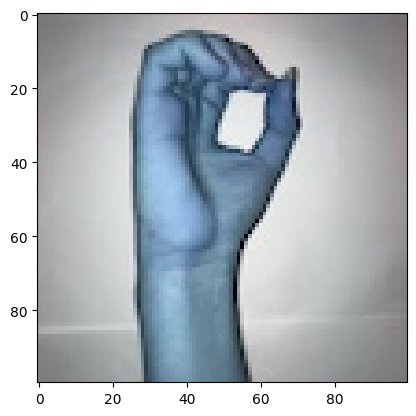

In [ ]:
path_test_0 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/test/0'   #path of folder

images_test_0 = os.listdir(path_test_0)                             #create list on image files
print("List Of Images: ",images_test_0)
print('Number of Images in Test set 0: ',len(images_test_0))

imgdata_test_0 = []                                                  #Empty list to store image data(RGB format)

for img in images_test_0:
  imgarr_test_0 = cv2.imread(os.path.join(path_test_0,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_test_0)                                          #Display Images
  imgdata_test_0.append(imgarr_test_0)

print("Shape of the Images in Test set 0: ",imgarr_test_0.shape)     #(height, width, channels)

Visualizing Images of Train set and Test set for number 1

List Of Images:  ['IMG_1313.JPG', 'IMG_1291.JPG', 'IMG_1302.JPG', 'IMG_1271.JPG', 'IMG_1220.JPG', 'IMG_1230.JPG', 'IMG_1240.JPG', 'IMG_1250.JPG', 'IMG_1261.JPG', 'IMG_1210.JPG', 'IMG_1200.JPG', 'IMG_1170.JPG', 'IMG_1129.JPG', 'IMG_1119.JPG', 'IMG_1139.JPG', 'IMG_1190.JPG', 'IMG_1180.JPG', 'IMG_1149.JPG', 'IMG_4382.JPG', 'IMG_4307.JPG', 'IMG_4287.JPG', 'IMG_4297.JPG', 'IMG_4349.JPG', 'IMG_4339.JPG', 'IMG_4371.JPG', 'IMG_4318.JPG', 'IMG_4329.JPG', 'IMG_4277.JPG', 'IMG_4244.JPG', 'IMG_4172.JPG', 'IMG_4182.JPG', 'IMG_4214.JPG', 'IMG_4194.JPG', 'IMG_4224.JPG', 'IMG_4160.JPG', 'IMG_4234.JPG', 'IMG_4204.JPG', 'IMG_4150.JPG', 'IMG_4140.JPG', 'IMG_4120.JPG', 'IMG_4110.JPG', 'IMG_4041.JPG', 'IMG_4050.JPG', 'IMG_4070.JPG', 'IMG_4090.JPG', 'IMG_4060.JPG', 'IMG_4080.JPG', 'IMG_1323.JPG', 'IMG_4726.JPG', 'IMG_4746.JPG', 'IMG_4756.JPG', 'IMG_4766.JPG', 'IMG_4635.JPG', 'IMG_4705.JPG', 'IMG_4696.JPG', 'IMG_4716.JPG', 'IMG_4625.JPG', 'IMG_4615.JPG', 'IMG_4595.JPG', 'IMG_4585.JPG', 'IMG_4544.JPG', 'IMG_4

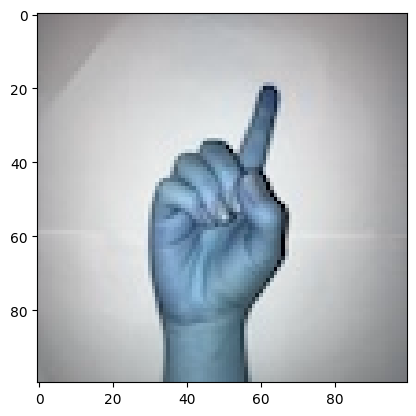

In [ ]:
path_train_1 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/train/1'   #path of folder

images_train_1 = os.listdir(path_train_1)                             #create list on image files
print("List Of Images: ",images_train_1)
print('Number of Images in Train set 1: ',len(images_train_1))

imgdata_train_1 = []                                                  #Empty list to store image data(RGB format)

for img in images_train_1:
  imgarr_train_1 = cv2.imread(os.path.join(path_train_1,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_train_1)                                          #Display Images
  imgdata_train_1.append(imgarr_train_1)

print("Shape of the Images in Train set 1: ",imgarr_train_1.shape)     #(height, width, channels)

List Of Images:  ['IMG_5467.JPG', 'IMG_1159.JPG', 'IMG_4477.JPG', 'IMG_5961.JPG', 'IMG_4806.JPG', 'IMG_5194.JPG', 'IMG_4100.JPG', 'IMG_4130.JPG', 'IMG_5508.JPG', 'IMG_5646.JPG', 'IMG_5593.JPG', 'IMG_5447.JPG', 'IMG_4897.JPG', 'IMG_4736.JPG', 'IMG_4787.JPG', 'IMG_4927.JPG', 'IMG_4675.JPG', 'IMG_5972.JPG', 'IMG_4255.JPG', 'IMG_4877.JPG', 'IMG_5626.JPG', 'IMG_4685.JPG', 'IMG_4360.JPG', 'IMG_5064.JPG', 'IMG_5616.JPG', 'IMG_4645.JPG', 'IMG_5549.JPG', 'IMG_5747.JPG', 'IMG_4267.JPG', 'IMG_5371.JPG', 'IMG_4977.JPG', 'IMG_5888.JPG', 'IMG_1281.JPG', 'IMG_4917.JPG', 'IMG_4827.JPG', 'IMG_5401.JPG', 'IMG_4777.JPG', 'IMG_5636.JPG', 'IMG_5267.JPG', 'IMG_5848.JPG', 'IMG_5717.JPG', 'IMG_5807.JPG']
Number of Images in Test set 1:  42
Shape of the Images in Test set 1:  (100, 100, 3)


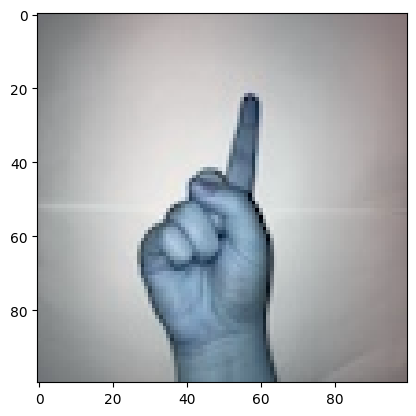

In [ ]:
path_test_1 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/test/1'   #path of folder

images_test_1 = os.listdir(path_test_1)                             #create list on image files
print("List Of Images: ",images_test_1)
print('Number of Images in Test set 1: ',len(images_test_1))

imgdata_test_1 = []                                                  #Empty list to store image data(RGB format)

for img in images_test_1:
  imgarr_test_1 = cv2.imread(os.path.join(path_test_1,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_test_1)                                          #Display Images
  imgdata_test_1.append(imgarr_test_1)

print("Shape of the Images in Test set 1: ",imgarr_test_1.shape)     #(height, width, channels)

Visualizing Images of Train set and Test set for number 2

List Of Images:  ['IMG_4535.JPG', 'IMG_4458.JPG', 'IMG_4415.JPG', 'IMG_4425.JPG', 'IMG_4438.JPG', 'IMG_4448.JPG', 'IMG_4393.JPG', 'IMG_4383.JPG', 'IMG_4372.JPG', 'IMG_4350.JPG', 'IMG_4405.JPG', 'IMG_4340.JPG', 'IMG_4308.JPG', 'IMG_4298.JPG', 'IMG_4319.JPG', 'IMG_4330.JPG', 'IMG_4278.JPG', 'IMG_4225.JPG', 'IMG_4235.JPG', 'IMG_4245.JPG', 'IMG_4288.JPG', 'IMG_4205.JPG', 'IMG_4215.JPG', 'IMG_4183.JPG', 'IMG_4173.JPG', 'IMG_4195.JPG', 'IMG_4121.JPG', 'IMG_4151.JPG', 'IMG_4141.JPG', 'IMG_4111.JPG', 'IMG_4161.JPG', 'IMG_4091.JPG', 'IMG_4061.JPG', 'IMG_4081.JPG', 'IMG_4071.JPG', 'IMG_1292.JPG', 'IMG_1314.JPG', 'IMG_1324.JPG', 'IMG_4042.JPG', 'IMG_1303.JPG', 'IMG_4051.JPG', 'IMG_1272.JPG', 'IMG_1262.JPG', 'IMG_1191.JPG', 'IMG_1221.JPG', 'IMG_1251.JPG', 'IMG_1201.JPG', 'IMG_1181.JPG', 'IMG_1211.JPG', 'IMG_1241.JPG', 'IMG_1231.JPG', 'IMG_1171.JPG', 'IMG_1140.JPG', 'IMG_1130.JPG', 'IMG_1120.JPG', 'IMG_1150.JPG', 'IMG_5174.JPG', 'IMG_5134.JPG', 'IMG_5165.JPG', 'IMG_5154.JPG', 'IMG_5093.JPG', 'IMG_5

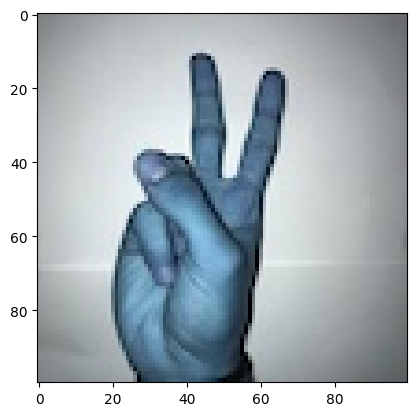

In [ ]:
path_train_2 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/train/2'   #path of folder

images_train_2 = os.listdir(path_train_2)                             #create list on image files
print("List Of Images: ",images_train_2)
print('Number of Images in Train set 2: ',len(images_train_2))

imgdata_train_2 = []                                                  #Empty list to store image data(RGB format)

for img in images_train_2:
  imgarr_train_2 = cv2.imread(os.path.join(path_train_2,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_train_2)                                          #Display Images
  imgdata_train_2.append(imgarr_train_2)

print("Shape of the Images in Train set 2: ",imgarr_train_2.shape)     #(height, width, channels)

List Of Images:  ['IMG_4478.JPG', 'IMG_4676.JPG', 'IMG_4788.JPG', 'IMG_1282.JPG', 'IMG_4898.JPG', 'IMG_4808.JPG', 'IMG_4828.JPG', 'IMG_4978.JPG', 'IMG_4878.JPG', 'IMG_4686.JPG', 'IMG_4101.JPG', 'IMG_5268.JPG', 'IMG_4131.JPG', 'IMG_4268.JPG', 'IMG_4778.JPG', 'IMG_4646.JPG', 'IMG_4256.JPG', 'IMG_4918.JPG', 'IMG_4928.JPG', 'IMG_5195.JPG', 'IMG_1160.JPG', 'IMG_4737.JPG', 'IMG_5076.JPG', 'IMG_4361.JPG', 'IMG_5627.JPG', 'IMG_5718.JPG', 'IMG_5962.JPG', 'IMG_5647.JPG', 'IMG_5889.JPG', 'IMG_5849.JPG', 'IMG_5448.JPG', 'IMG_5594.JPG', 'IMG_5509.JPG', 'IMG_5637.JPG', 'IMG_5748.JPG', 'IMG_5617.JPG', 'IMG_5402.JPG', 'IMG_5372.JPG', 'IMG_5973.JPG', 'IMG_5554.JPG', 'IMG_5468.JPG', 'IMG_5808.JPG']
Number of Images in Test set 2:  42
Shape of the Images in Test set 2:  (100, 100, 3)


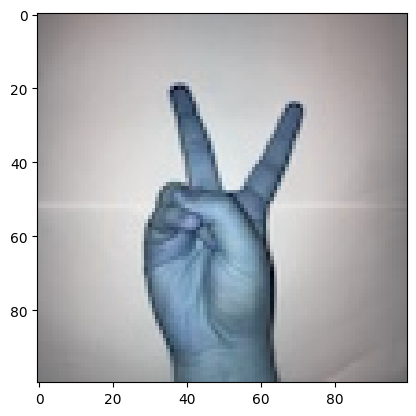

In [ ]:
path_test_2 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/test/2'   #path of folder

images_test_2 = os.listdir(path_test_2)                             #create list on image files
print("List Of Images: ",images_test_2)
print('Number of Images in Test set 2: ',len(images_test_2))

imgdata_test_2 = []                                                  #Empty list to store image data(RGB format)

for img in images_test_2:
  imgarr_test_2 = cv2.imread(os.path.join(path_test_2,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_test_2)                                          #Display Images
  imgdata_test_2.append(imgarr_test_2)

print("Shape of the Images in Test set 2: ",imgarr_test_2.shape)     #(height, width, channels)

Visualizing Images of Train set and Test set for number 3

List Of Images:  ['IMG_1182.JPG', 'IMG_1121.JPG', 'IMG_4587.JPG', 'IMG_4536.JPG', 'IMG_4509.JPG', 'IMG_4479.JPG', 'IMG_4439.JPG', 'IMG_4499.JPG', 'IMG_4427.JPG', 'IMG_4449.JPG', 'IMG_4416.JPG', 'IMG_4489.JPG', 'IMG_4459.JPG', 'IMG_4406.JPG', 'IMG_4373.JPG', 'IMG_4394.JPG', 'IMG_4362.JPG', 'IMG_4384.JPG', 'IMG_4299.JPG', 'IMG_4331.JPG', 'IMG_4309.JPG', 'IMG_4320.JPG', 'IMG_4341.JPG', 'IMG_4289.JPG', 'IMG_4279.JPG', 'IMG_4246.JPG', 'IMG_4236.JPG', 'IMG_4269.JPG', 'IMG_4196.JPG', 'IMG_4216.JPG', 'IMG_4184.JPG', 'IMG_4206.JPG', 'IMG_4226.JPG', 'IMG_4174.JPG', 'IMG_4152.JPG', 'IMG_4162.JPG', 'IMG_4122.JPG', 'IMG_4142.JPG', 'IMG_4082.JPG', 'IMG_4072.JPG', 'IMG_4062.JPG', 'IMG_4092.JPG', 'IMG_4112.JPG', 'IMG_4052.JPG', 'IMG_4043.JPG', 'IMG_1242.JPG', 'IMG_1253.JPG', 'IMG_1305.JPG', 'IMG_1325.JPG', 'IMG_1263.JPG', 'IMG_1273.JPG', 'IMG_1315.JPG', 'IMG_1294.JPG', 'IMG_1232.JPG', 'IMG_1222.JPG', 'IMG_1212.JPG', 'IMG_1131.JPG', 'IMG_1151.JPG', 'IMG_1141.JPG', 'IMG_1172.JPG', 'IMG_1202.JPG', 'IMG_1

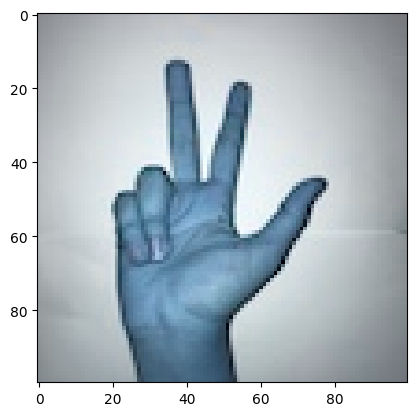

In [ ]:
path_train_3 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/train/3'   #path of folder

images_train_3 = os.listdir(path_train_3)                             #create list on image files
print("List Of Images: ",images_train_3)
print('Number of Images in Train set 3: ',len(images_train_3))

imgdata_train_3 = []                                                  #Empty list to store image data(RGB format)

for img in images_train_3:
  imgarr_train_3 = cv2.imread(os.path.join(path_train_3,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_train_3)                                          #Display Images
  imgdata_train_3.append(imgarr_train_3)

print("Shape of the Images in Train set 3: ",imgarr_train_3.shape)     #(height, width, channels)

List Of Images:  ['IMG_5974.JPG', 'IMG_1161.JPG', 'IMG_4469.JPG', 'IMG_4247.JPG', 'IMG_5963.JPG', 'IMG_4637.JPG', 'IMG_5066.JPG', 'IMG_5595.JPG', 'IMG_5638.JPG', 'IMG_5403.JPG', 'IMG_4779.JPG', 'IMG_5628.JPG', 'IMG_5648.JPG', 'IMG_4799.JPG', 'IMG_4809.JPG', 'IMG_5196.JPG', 'IMG_4728.JPG', 'IMG_5719.JPG', 'IMG_5469.JPG', 'IMG_4132.JPG', 'IMG_5555.JPG', 'IMG_4647.JPG', 'IMG_5850.JPG', 'IMG_5269.JPG', 'IMG_5510.JPG', 'IMG_5749.JPG', 'IMG_5618.JPG', 'IMG_4677.JPG', 'IMG_4909.JPG', 'IMG_1283.JPG', 'IMG_4102.JPG', 'IMG_4351.JPG', 'IMG_4258.JPG', 'IMG_4889.JPG', 'IMG_5809.JPG', 'IMG_4768.JPG', 'IMG_5890.JPG', 'IMG_5449.JPG', 'IMG_4969.JPG', 'IMG_4869.JPG', 'IMG_5373.JPG', 'IMG_4919.JPG']
Number of Images in Test set 3:  42
Shape of the Images in Test set 3:  (100, 100, 3)


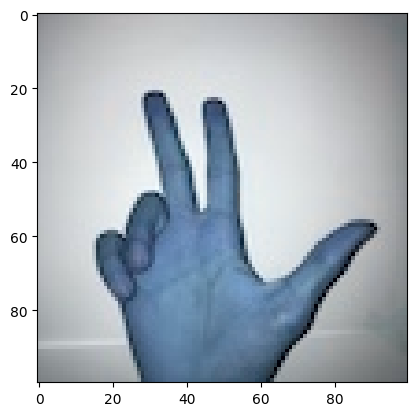

In [ ]:
path_test_3 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/test/3'   #path of folder

images_test_3 = os.listdir(path_test_3)                             #create list on image files
print("List Of Images: ",images_test_3)
print('Number of Images in Test set 3: ',len(images_test_3))

imgdata_test_3 = []                                                  #Empty list to store image data(RGB format)

for img in images_test_3:
  imgarr_test_3 = cv2.imread(os.path.join(path_test_3,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_test_3)                                          #Display Images
  imgdata_test_0.append(imgarr_test_3)

print("Shape of the Images in Test set 3: ",imgarr_test_3.shape)     #(height, width, channels)

Visualizing Images of Train set and Test set for number 4

List Of Images:  ['IMG_4073.JPG', 'IMG_4063.JPG', 'IMG_4053.JPG', 'IMG_4083.JPG', 'IMG_4093.JPG', 'IMG_4044.JPG', 'IMG_1326.JPG', 'IMG_1233.JPG', 'IMG_1295.JPG', 'IMG_1264.JPG', 'IMG_1254.JPG', 'IMG_1316.JPG', 'IMG_1243.JPG', 'IMG_1306.JPG', 'IMG_1274.JPG', 'IMG_1223.JPG', 'IMG_1193.JPG', 'IMG_1183.JPG', 'IMG_1213.JPG', 'IMG_1203.JPG', 'IMG_1132.JPG', 'IMG_1142.JPG', 'IMG_1152.JPG', 'IMG_1122.JPG', 'IMG_1173.JPG', 'IMG_4460.JPG', 'IMG_4407.JPG', 'IMG_4352.JPG', 'IMG_4385.JPG', 'IMG_4395.JPG', 'IMG_4374.JPG', 'IMG_4300.JPG', 'IMG_4332.JPG', 'IMG_4310.JPG', 'IMG_4321.JPG', 'IMG_4342.JPG', 'IMG_4290.JPG', 'IMG_4248.JPG', 'IMG_4227.JPG', 'IMG_4217.JPG', 'IMG_4197.JPG', 'IMG_4185.JPG', 'IMG_4175.JPG', 'IMG_4237.JPG', 'IMG_4280.JPG', 'IMG_4207.JPG', 'IMG_4143.JPG', 'IMG_4153.JPG', 'IMG_4123.JPG', 'IMG_4113.JPG', 'IMG_4163.JPG', 'IMG_4830.JPG', 'IMG_4749.JPG', 'IMG_4820.JPG', 'IMG_4790.JPG', 'IMG_4759.JPG', 'IMG_4709.JPG', 'IMG_4719.JPG', 'IMG_4688.JPG', 'IMG_4698.JPG', 'IMG_4739.JPG', 'IMG_4

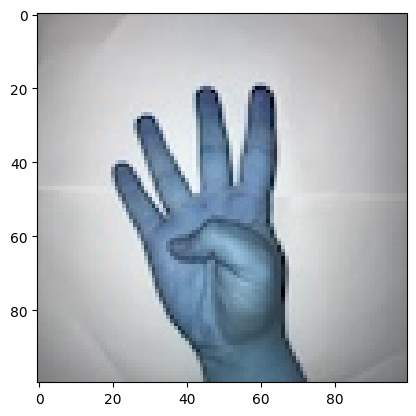

In [ ]:
path_train_4 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/train/4'   #path of folder

images_train_4 = os.listdir(path_train_4)                             #create list on image files
print("List Of Images: ",images_train_4)
print('Number of Images in Train set 4: ',len(images_train_4))

imgdata_train_4 = []                                                  #Empty list to store image data(RGB format)

for img in images_train_4:
  imgarr_train_4 = cv2.imread(os.path.join(path_train_4,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_train_4)                                          #Display Images
  imgdata_train_4.append(imgarr_train_4)

print("Shape of the Images in Train set 4: ",imgarr_train_4.shape)     #(height, width, channels)

List Of Images:  ['IMG_5881.JPG', 'IMG_5608.JPG', 'IMG_4780.JPG', 'IMG_4363.JPG', 'IMG_5541.JPG', 'IMG_5964.JPG', 'IMG_5740.JPG', 'IMG_5619.JPG', 'IMG_5501.JPG', 'IMG_5460.JPG', 'IMG_4103.JPG', 'IMG_5364.JPG', 'IMG_4800.JPG', 'IMG_4810.JPG', 'IMG_5911.JPG', 'IMG_4480.JPG', 'IMG_4668.JPG', 'IMG_4960.JPG', 'IMG_5800.JPG', 'IMG_1284.JPG', 'IMG_4860.JPG', 'IMG_4900.JPG', 'IMG_4270.JPG', 'IMG_4880.JPG', 'IMG_4678.JPG', 'IMG_5709.JPG', 'IMG_4648.JPG', 'IMG_5260.JPG', 'IMG_5426.JPG', 'IMG_4769.JPG', 'IMG_4259.JPG', 'IMG_4910.JPG', 'IMG_5394.JPG', 'IMG_5187.JPG', 'IMG_5639.JPG', 'IMG_5841.JPG', 'IMG_5975.JPG', 'IMG_4133.JPG', 'IMG_4729.JPG', 'IMG_5057.JPG', 'IMG_5629.JPG', 'IMG_1162.JPG']
Number of Images in Test set 4:  42
Shape of the Images in Test set 4:  (100, 100, 3)


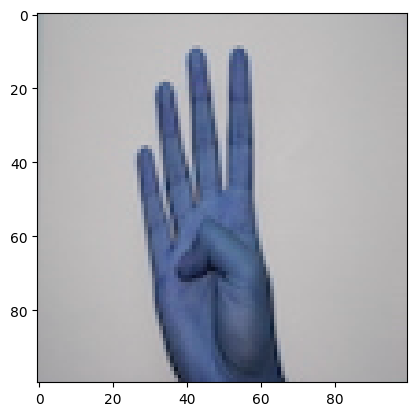

In [ ]:
path_test_4 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/test/4'   #path of folder

images_test_4 = os.listdir(path_test_4)                             #create list on image files
print("List Of Images: ",images_test_4)
print('Number of Images in Test set 4: ',len(images_test_4))

imgdata_test_4 = []                                                  #Empty list to store image data(RGB format)

for img in images_test_4:
  imgarr_test_4 = cv2.imread(os.path.join(path_test_4,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_test_4)                                          #Display Images
  imgdata_test_0.append(imgarr_test_4)

print("Shape of the Images in Test set 4: ",imgarr_test_4.shape)     #(height, width, channels)

Visualizing Images of Train set and Test set for number 5

List Of Images:  ['IMG_4084.JPG', 'IMG_4054.JPG', 'IMG_4074.JPG', 'IMG_4064.JPG', 'IMG_1307.JPG', 'IMG_1327.JPG', 'IMG_1317.JPG', 'IMG_1296.JPG', 'IMG_4094.JPG', 'IMG_1184.JPG', 'IMG_1194.JPG', 'IMG_1204.JPG', 'IMG_1214.JPG', 'IMG_4039.JPG', 'IMG_1275.JPG', 'IMG_1255.JPG', 'IMG_1244.JPG', 'IMG_1265.JPG', 'IMG_1234.JPG', 'IMG_1224.JPG', 'IMG_1174.JPG', 'IMG_1153.JPG', 'IMG_1143.JPG', 'IMG_1123.JPG', 'IMG_1133.JPG', 'IMG_4461.JPG', 'IMG_4451.JPG', 'IMG_4429.JPG', 'IMG_4441.JPG', 'IMG_4418.JPG', 'IMG_4386.JPG', 'IMG_4353.JPG', 'IMG_4375.JPG', 'IMG_4396.JPG', 'IMG_4408.JPG', 'IMG_4343.JPG', 'IMG_4322.JPG', 'IMG_4301.JPG', 'IMG_4311.JPG', 'IMG_4238.JPG', 'IMG_4249.JPG', 'IMG_4228.JPG', 'IMG_4281.JPG', 'IMG_4333.JPG', 'IMG_4291.JPG', 'IMG_4218.JPG', 'IMG_4186.JPG', 'IMG_4208.JPG', 'IMG_4176.JPG', 'IMG_4198.JPG', 'IMG_4114.JPG', 'IMG_4144.JPG', 'IMG_4124.JPG', 'IMG_4154.JPG', 'IMG_4164.JPG', 'IMG_4831.JPG', 'IMG_4791.JPG', 'IMG_4750.JPG', 'IMG_4760.JPG', 'IMG_4821.JPG', 'IMG_4740.JPG', 'IMG_4

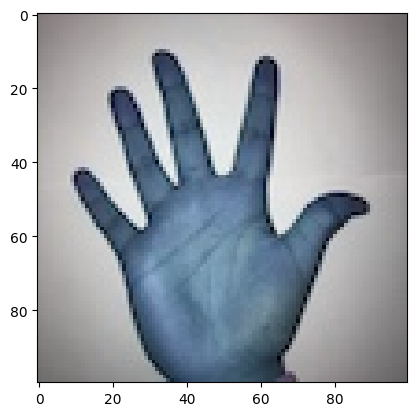

In [ ]:
path_train_5 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/train/5'   #path of folder

images_train_5 = os.listdir(path_train_5)                             #create list on image files
print("List Of Images: ",images_train_5)
print('Number of Images in Train set 5: ',len(images_train_5))

imgdata_train_5 = []                                                  #Empty list to store image data(RGB format)

for img in images_train_5:
  imgarr_train_5 = cv2.imread(os.path.join(path_train_5,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_train_5)                                          #Display Images
  imgdata_train_5.append(imgarr_train_5)

print("Shape of the Images in Train set 5: ",imgarr_train_5.shape)     #(height, width, channels)

List Of Images:  ['IMG_4669.JPG', 'IMG_4481.JPG', 'IMG_4104.JPG', 'IMG_5913.JPG', 'IMG_4801.JPG', 'IMG_5461.JPG', 'IMG_1163.JPG', 'IMG_5741.JPG', 'IMG_4881.JPG', 'IMG_5965.JPG', 'IMG_4364.JPG', 'IMG_5427.JPG', 'IMG_4901.JPG', 'IMG_4961.JPG', 'IMG_5620.JPG', 'IMG_4730.JPG', 'IMG_4134.JPG', 'IMG_5365.JPG', 'IMG_5882.JPG', 'IMG_5609.JPG', 'IMG_5058.JPG', 'IMG_5188.JPG', 'IMG_4861.JPG', 'IMG_5842.JPG', 'IMG_5640.JPG', 'IMG_4649.JPG', 'IMG_5502.JPG', 'IMG_5976.JPG', 'IMG_4811.JPG', 'IMG_4271.JPG', 'IMG_4679.JPG', 'IMG_5630.JPG', 'IMG_4770.JPG', 'IMG_5261.JPG', 'IMG_4911.JPG', 'IMG_4781.JPG', 'IMG_5542.JPG', 'IMG_4260.JPG', 'IMG_1285.JPG', 'IMG_5395.JPG', 'IMG_5710.JPG', 'IMG_5801.JPG']
Number of Images in Test set 5:  42
Shape of the Images in Test set 5:  (100, 100, 3)


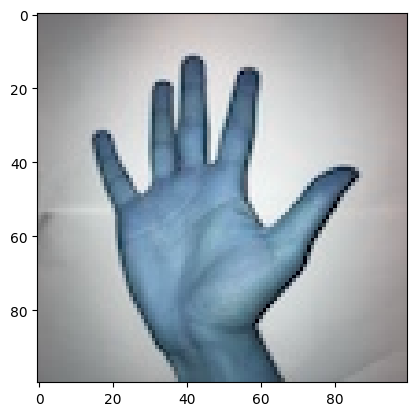

In [ ]:
path_test_5 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/test/5'   #path of folder

images_test_5 = os.listdir(path_test_5)                             #create list on image files
print("List Of Images: ",images_test_5)
print('Number of Images in Test set 5: ',len(images_test_5))

imgdata_test_5 = []                                                  #Empty list to store image data(RGB format)

for img in images_test_5:
  imgarr_test_5 = cv2.imread(os.path.join(path_test_5,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_test_5)                                          #Display Images
  imgdata_test_5.append(imgarr_test_5)

print("Shape of the Images in Test set 5: ",imgarr_test_5.shape)     #(height, width, channels)

Visualizing Images of Train set and Test set for number 6

List Of Images:  ['IMG_4165.JPG', 'IMG_4155.JPG', 'IMG_4145.JPG', 'IMG_4125.JPG', 'IMG_4115.JPG', 'IMG_4055.JPG', 'IMG_4085.JPG', 'IMG_4075.JPG', 'IMG_4065.JPG', 'IMG_4095.JPG', 'IMG_4045.JPG', 'IMG_1308.JPG', 'IMG_1318.JPG', 'IMG_1328.JPG', 'IMG_1266.JPG', 'IMG_1235.JPG', 'IMG_1256.JPG', 'IMG_1245.JPG', 'IMG_1276.JPG', 'IMG_1297.JPG', 'IMG_1225.JPG', 'IMG_1195.JPG', 'IMG_1215.JPG', 'IMG_1205.JPG', 'IMG_1134.JPG', 'IMG_1124.JPG', 'IMG_1144.JPG', 'IMG_1154.JPG', 'IMG_1175.JPG', 'IMG_1185.JPG', 'IMG_4512.JPG', 'IMG_4452.JPG', 'IMG_4430.JPG', 'IMG_4419.JPG', 'IMG_4442.JPG', 'IMG_4492.JPG', 'IMG_4472.JPG', 'IMG_4502.JPG', 'IMG_4462.JPG', 'IMG_4409.JPG', 'IMG_4397.JPG', 'IMG_4376.JPG', 'IMG_4312.JPG', 'IMG_4334.JPG', 'IMG_4323.JPG', 'IMG_4354.JPG', 'IMG_4302.JPG', 'IMG_4387.JPG', 'IMG_4344.JPG', 'IMG_4292.JPG', 'IMG_4239.JPG', 'IMG_4282.JPG', 'IMG_4229.JPG', 'IMG_4250.JPG', 'IMG_4209.JPG', 'IMG_4187.JPG', 'IMG_4199.JPG', 'IMG_4177.JPG', 'IMG_4219.JPG', 'IMG_4842.JPG', 'IMG_4852.JPG', 'IMG_4

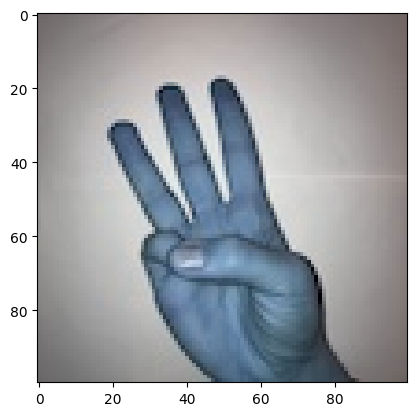

In [ ]:
path_train_6 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/train/6'   #path of folder

images_train_6 = os.listdir(path_train_6)                             #create list on image files
print("List Of Images: ",images_train_6)
print('Number of Images in Train set 6: ',len(images_train_6))

imgdata_train_6 = []                                                  #Empty list to store image data(RGB format)

for img in images_train_6:
  imgarr_train_6 = cv2.imread(os.path.join(path_train_6,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_train_6)                                          #Display Images
  imgdata_train_6.append(imgarr_train_6)

print("Shape of the Images in Train set 6: ",imgarr_train_6.shape)     #(height, width, channels)

List Of Images:  ['IMG_5059.JPG', 'IMG_4802.JPG', 'IMG_4902.JPG', 'IMG_4771.JPG', 'IMG_4365.JPG', 'IMG_4862.JPG', 'IMG_4105.JPG', 'IMG_5621.JPG', 'IMG_5711.JPG', 'IMG_5742.JPG', 'IMG_4812.JPG', 'IMG_5914.JPG', 'IMG_5977.JPG', 'IMG_5843.JPG', 'IMG_5631.JPG', 'IMG_4135.JPG', 'IMG_4882.JPG', 'IMG_4650.JPG', 'IMG_1286.JPG', 'IMG_4272.JPG', 'IMG_5366.JPG', 'IMG_4912.JPG', 'IMG_5883.JPG', 'IMG_4482.JPG', 'IMG_5641.JPG', 'IMG_5503.JPG', 'IMG_5802.JPG', 'IMG_4782.JPG', 'IMG_1164.JPG', 'IMG_5611.JPG', 'IMG_4670.JPG', 'IMG_5262.JPG', 'IMG_4731.JPG', 'IMG_5189.JPG', 'IMG_4962.JPG', 'IMG_4261.JPG', 'IMG_5543.JPG', 'IMG_5966.JPG', 'IMG_5396.JPG', 'IMG_5428.JPG', 'IMG_4680.JPG', 'IMG_5462.JPG']
Number of Images in Test set 6:  42
Shape of the Images in Test set 6:  (100, 100, 3)


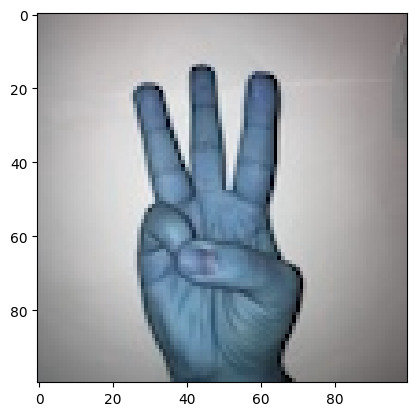

In [ ]:
path_test_6 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/test/6'   #path of folder

images_test_6 = os.listdir(path_test_6)                             #create list on image files
print("List Of Images: ",images_test_6)
print('Number of Images in Test set 6: ',len(images_test_6))

imgdata_test_6 = []                                                  #Empty list to store image data(RGB format)

for img in images_test_6:
  imgarr_test_6 = cv2.imread(os.path.join(path_test_6,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_test_6)                                          #Display Images
  imgdata_test_6.append(imgarr_test_6)

print("Shape of the Images in Test set 6: ",imgarr_test_6.shape)     #(height, width, channels)

Visualizing Images of Train set and Test set for number 7

List Of Images:  ['IMG_5935.JPG', 'IMG_5874.JPG', 'IMG_1236.JPG', 'IMG_1176.JPG', 'IMG_1145.JPG', 'IMG_1125.JPG', 'IMG_1135.JPG', 'IMG_1155.JPG', 'IMG_4220.JPG', 'IMG_4210.JPG', 'IMG_4200.JPG', 'IMG_4188.JPG', 'IMG_4178.JPG', 'IMG_4116.JPG', 'IMG_4146.JPG', 'IMG_4156.JPG', 'IMG_4126.JPG', 'IMG_4166.JPG', 'IMG_4096.JPG', 'IMG_1298.JPG', 'IMG_4086.JPG', 'IMG_4056.JPG', 'IMG_1329.JPG', 'IMG_1319.JPG', 'IMG_4076.JPG', 'IMG_1309.JPG', 'IMG_4066.JPG', 'IMG_4046.JPG', 'IMG_1277.JPG', 'IMG_1267.JPG', 'IMG_1257.JPG', 'IMG_1246.JPG', 'IMG_1186.JPG', 'IMG_1226.JPG', 'IMG_1216.JPG', 'IMG_1196.JPG', 'IMG_1206.JPG', 'IMG_4591.JPG', 'IMG_4581.JPG', 'IMG_4571.JPG', 'IMG_4551.JPG', 'IMG_4561.JPG', 'IMG_4473.JPG', 'IMG_4503.JPG', 'IMG_4513.JPG', 'IMG_4493.JPG', 'IMG_4540.JPG', 'IMG_4463.JPG', 'IMG_4453.JPG', 'IMG_4443.JPG', 'IMG_4420.JPG', 'IMG_4431.JPG', 'IMG_4355.JPG', 'IMG_4388.JPG', 'IMG_4398.JPG', 'IMG_4377.JPG', 'IMG_4410.JPG', 'IMG_4345.JPG', 'IMG_4303.JPG', 'IMG_4335.JPG', 'IMG_4324.JPG', 'IMG_4

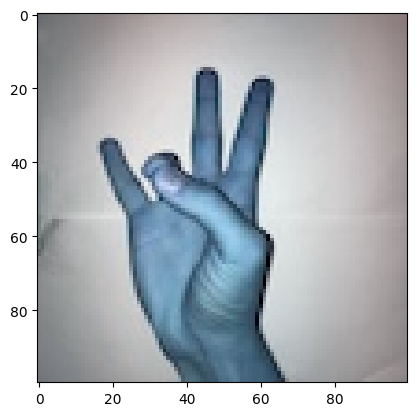

In [ ]:
path_train_7 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/train/7'   #path of folder

images_train_7 = os.listdir(path_train_7)                             #create list on image files
print("List Of Images: ",images_train_7)
print('Number of Images in Train set 7: ',len(images_train_7))

imgdata_train_7 = []                                                  #Empty list to store image data(RGB format)

for img in images_train_7:
  imgarr_train_7 = cv2.imread(os.path.join(path_train_7,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_train_7)                                          #Display Images
  imgdata_train_7.append(imgarr_train_7)

print("Shape of the Images in Train set 7: ",imgarr_train_7.shape)     #(height, width, channels)

List Of Images:  ['IMG_5723.JPG', 'IMG_5559.JPG', 'IMG_5514.JPG', 'IMG_5978.JPG', 'IMG_4681.JPG', 'IMG_1165.JPG', 'IMG_4262.JPG', 'IMG_4883.JPG', 'IMG_5642.JPG', 'IMG_5409.JPG', 'IMG_5967.JPG', 'IMG_4273.JPG', 'IMG_4913.JPG', 'IMG_4863.JPG', 'IMG_1287.JPG', 'IMG_4803.JPG', 'IMG_5813.JPG', 'IMG_5652.JPG', 'IMG_5473.JPG', 'IMG_4783.JPG', 'IMG_5632.JPG', 'IMG_4651.JPG', 'IMG_5060.JPG', 'IMG_4732.JPG', 'IMG_4813.JPG', 'IMG_5854.JPG', 'IMG_4366.JPG', 'IMG_4671.JPG', 'IMG_5622.JPG', 'IMG_4106.JPG', 'IMG_5273.JPG', 'IMG_4963.JPG', 'IMG_5894.JPG', 'IMG_5599.JPG', 'IMG_4903.JPG', 'IMG_5200.JPG', 'IMG_5453.JPG', 'IMG_5377.JPG', 'IMG_4772.JPG', 'IMG_5753.JPG', 'IMG_4136.JPG', 'IMG_4483.JPG']
Number of Images in Test set 7:  42
Shape of the Images in Test set 7:  (100, 100, 3)


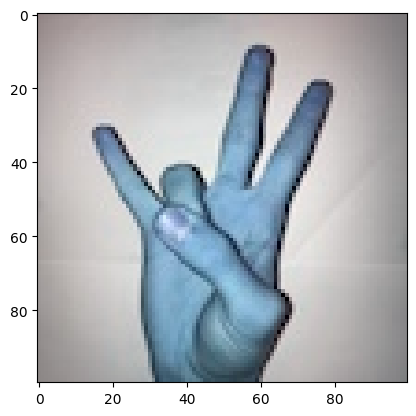

In [ ]:
path_test_7 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/test/7'   #path of folder

images_test_7 = os.listdir(path_test_7)                             #create list on image files
print("List Of Images: ",images_test_7)
print('Number of Images in Test set 7: ',len(images_test_7))

imgdata_test_7 = []                                                  #Empty list to store image data(RGB format)

for img in images_test_7:
  imgarr_test_7 = cv2.imread(os.path.join(path_test_7,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_test_7)                                          #Display Images
  imgdata_test_7.append(imgarr_test_7)

print("Shape of the Images in Test set 7: ",imgarr_test_7.shape)     #(height, width, channels)

Visualizing Images of Train set and Test set for number 8

List Of Images:  ['IMG_5744.JPG', 'IMG_5025.JPG', 'IMG_5764.JPG', 'IMG_5348.JPG', 'IMG_5211.JPG', 'IMG_5484.JPG', 'IMG_4378.JPG', 'IMG_4484.JPG', 'IMG_5099.JPG', 'IMG_5231.JPG', 'IMG_4167.JPG', 'IMG_5515.JPG', 'IMG_5368.JPG', 'IMG_5774.JPG', 'IMG_5784.JPG', 'IMG_4514.JPG', 'IMG_4944.JPG', 'IMG_5865.JPG', 'IMG_5623.JPG', 'IMG_1330.JPG', 'IMG_5834.JPG', 'IMG_5505.JPG', 'IMG_5398.JPG', 'IMG_5673.JPG', 'IMG_5570.JPG', 'IMG_5653.JPG', 'IMG_1146.JPG', 'IMG_4592.JPG', 'IMG_1217.JPG', 'IMG_1310.JPG', 'IMG_1126.JPG', 'IMG_5015.JPG', 'IMG_1237.JPG', 'IMG_1197.JPG', 'IMG_4753.JPG', 'IMG_5378.JPG', 'IMG_4824.JPG', 'IMG_4914.JPG', 'IMG_5201.JPG', 'IMG_4733.JPG', 'IMG_4057.JPG', 'IMG_5560.JPG', 'IMG_4504.JPG', 'IMG_4211.JPG', 'IMG_5295.JPG', 'IMG_4189.JPG', 'IMG_5191.JPG', 'IMG_4399.JPG', 'IMG_1320.JPG', 'IMG_5221.JPG', 'IMG_1207.JPG', 'IMG_5242.JPG', 'IMG_4682.JPG', 'IMG_4157.JPG', 'IMG_5326.JPG', 'IMG_5545.JPG', 'IMG_4067.JPG', 'IMG_1227.JPG', 'IMG_4087.JPG', 'IMG_4713.JPG', 'IMG_4367.JPG', 'IMG_4

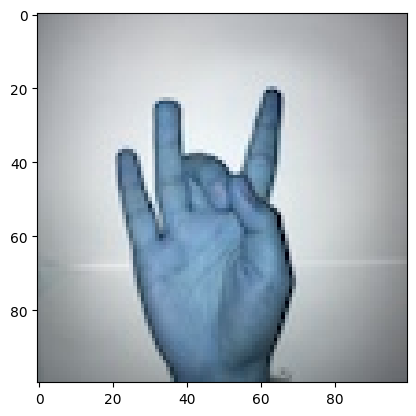

In [ ]:
path_train_8 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/train/8'   #path of folder

images_train_8 = os.listdir(path_train_8)                             #create list on image files
print("List Of Images: ",images_train_8)
print('Number of Images in Train set 8: ',len(images_train_8))

imgdata_train_8 = []                                                  #Empty list to store image data(RGB format)

for img in images_train_8:
  imgarr_train_8 = cv2.imread(os.path.join(path_train_8,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_train_8)                                          #Display Images
  imgdata_train_8.append(imgarr_train_8)

print("Shape of the Images in Train set 8: ",imgarr_train_8.shape)     #(height, width, channels)

List Of Images:  ['IMG_4252.JPG', 'IMG_4794.JPG', 'IMG_4854.JPG', 'IMG_1166.JPG', 'IMG_5734.JPG', 'IMG_5420.JPG', 'IMG_4723.JPG', 'IMG_4894.JPG', 'IMG_5358.JPG', 'IMG_5845.JPG', 'IMG_4672.JPG', 'IMG_1278.JPG', 'IMG_4642.JPG', 'IMG_5051.JPG', 'IMG_5388.JPG', 'IMG_4474.JPG', 'IMG_5181.JPG', 'IMG_5633.JPG', 'IMG_5713.JPG', 'IMG_4774.JPG', 'IMG_5535.JPG', 'IMG_5600.JPG', 'IMG_5703.JPG', 'IMG_4874.JPG', 'IMG_5905.JPG', 'IMG_5794.JPG', 'IMG_4264.JPG', 'IMG_4652.JPG', 'IMG_5885.JPG', 'IMG_5613.JPG', 'IMG_5979.JPG', 'IMG_5495.JPG', 'IMG_4097.JPG', 'IMG_5454.JPG', 'IMG_5970.JPG', 'IMG_4127.JPG', 'IMG_5253.JPG', 'IMG_4904.JPG', 'IMG_4954.JPG', 'IMG_4804.JPG', 'IMG_4356.JPG', 'IMG_4763.JPG']
Number of Images in Test set 8:  42
Shape of the Images in Test set 8:  (100, 100, 3)


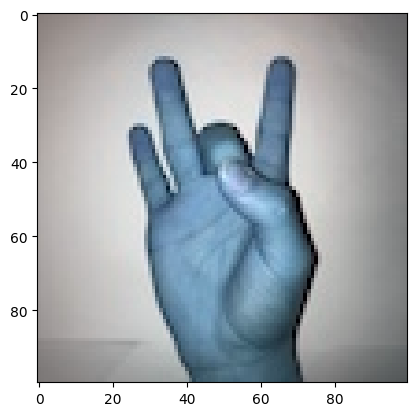

In [ ]:
path_test_8 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/test/8'   #path of folder

images_test_8 = os.listdir(path_test_8)                             #create list on image files
print("List Of Images: ",images_test_8)
print('Number of Images in Test set 8: ',len(images_test_8))

imgdata_test_8 = []                                                  #Empty list to store image data(RGB format)

for img in images_test_8:
  imgarr_test_8 = cv2.imread(os.path.join(path_test_8,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_test_8)                                          #Display Images
  imgdata_test_8.append(imgarr_test_8)

print("Shape of the Images in Test set 8: ",imgarr_test_8.shape)     #(height, width, channels)

Visualizing Images of Train set and Test set for number 9

List Of Images:  ['IMG_4875.JPG', 'IMG_5202.JPG', 'IMG_1147.JPG', 'IMG_5654.JPG', 'IMG_5475.JPG', 'IMG_5601.JPG', 'IMG_1218.JPG', 'IMG_5455.JPG', 'IMG_1321.JPG', 'IMG_4357.JPG', 'IMG_4855.JPG', 'IMG_4764.JPG', 'IMG_4285.JPG', 'IMG_5052.JPG', 'IMG_1311.JPG', 'IMG_1208.JPG', 'IMG_4573.JPG', 'IMG_4633.JPG', 'IMG_4805.JPG', 'IMG_4955.JPG', 'IMG_4603.JPG', 'IMG_5040.JPG', 'IMG_5379.JPG', 'IMG_4088.JPG', 'IMG_4714.JPG', 'IMG_5674.JPG', 'IMG_5327.JPG', 'IMG_4390.JPG', 'IMG_4048.JPG', 'IMG_5182.JPG', 'IMG_5496.JPG', 'IMG_4495.JPG', 'IMG_4724.JPG', 'IMG_1269.JPG', 'IMG_4148.JPG', 'IMG_5026.JPG', 'IMG_5233.JPG', 'IMG_4505.JPG', 'IMG_4475.JPG', 'IMG_5192.JPG', 'IMG_4158.JPG', 'IMG_4232.JPG', 'IMG_5546.JPG', 'IMG_4975.JPG', 'IMG_4068.JPG', 'IMG_5131.JPG', 'IMG_1331.JPG', 'IMG_5591.JPG', 'IMG_5151.JPG', 'IMG_4379.JPG', 'IMG_4128.JPG', 'IMG_5624.JPG', 'IMG_4553.JPG', 'IMG_4895.JPG', 'IMG_4465.JPG', 'IMG_5307.JPG', 'IMG_4445.JPG', 'IMG_4734.JPG', 'IMG_5006.JPG', 'IMG_4347.JPG', 'IMG_5100.JPG', 'IMG_1

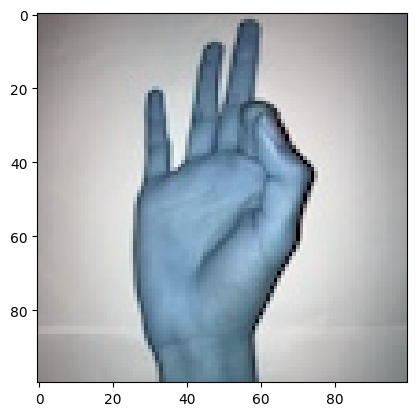

In [ ]:
path_train_9 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/train/9'   #path of folder

images_train_9 = os.listdir(path_train_9)                             #create list on image files
print("List Of Images: ",images_train_9)
print('Number of Images in Train set 9: ',len(images_train_9))

imgdata_train_9 = []                                                  #Empty list to store image data(RGB format)

for img in images_train_9:
  imgarr_train_9 = cv2.imread(os.path.join(path_train_9,img))         #Read images of particular type at particular path and
  plt.imshow(imgarr_train_9)                                          #Display Images
  imgdata_train_9.append(imgarr_train_9)

print("Shape of the Images in Train set 9: ",imgarr_train_9.shape)     #(height, width, channels)

List Of Images:  ['IMG_5485.JPG', 'IMG_4795.JPG', 'IMG_4985.JPG', 'IMG_4825.JPG', 'IMG_5285.JPG', 'IMG_4683.JPG', 'IMG_4785.JPG', 'IMG_4905.JPG', 'IMG_4108.JPG', 'IMG_5634.JPG', 'IMG_4138.JPG', 'IMG_5465.JPG', 'IMG_4935.JPG', 'IMG_5526.JPG', 'IMG_4485.JPG', 'IMG_5571.JPG', 'IMG_5084.JPG', 'IMG_4744.JPG', 'IMG_4835.JPG', 'IMG_4368.JPG', 'IMG_5421.JPG', 'IMG_4885.JPG', 'IMG_5212.JPG', 'IMG_1289.JPG', 'IMG_4693.JPG', 'IMG_5389.JPG', 'IMG_4265.JPG', 'IMG_5664.JPG', 'IMG_1168.JPG', 'IMG_4673.JPG', 'IMG_4925.JPG', 'IMG_5644.JPG', 'IMG_4275.JPG', 'IMG_5927.JPG', 'IMG_5846.JPG', 'IMG_5765.JPG', 'IMG_5735.JPG', 'IMG_5714.JPG', 'IMG_5825.JPG', 'IMG_5886.JPG', 'IMG_5959.JPG']
Number of Images in Test set 9:  41
Shape of the Images in Test set 9:  (100, 100, 3)


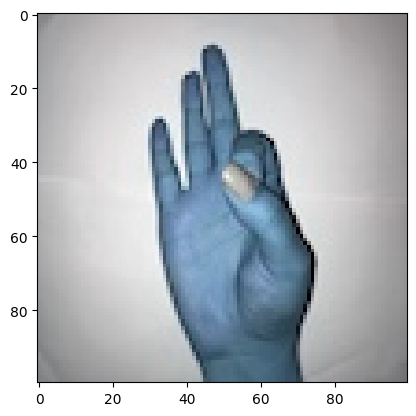

In [ ]:
path_test_9 = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/test/9'   #path of folder

images_test_9 = os.listdir(path_test_9)                                 #create list on image files
print("List Of Images: ",images_test_9)
print('Number of Images in Test set 9: ',len(images_test_9))

imgdata_test_9 = []                                                     #Empty list to store image data(RGB format)

for img in images_test_9:
  imgarr_test_9 = cv2.imread(os.path.join(path_test_9,img))             #Read images of particular type at particular path and
  plt.imshow(imgarr_test_9)                                             #Display Images
  imgdata_test_9.append(imgarr_test_9)

print("Shape of the Images in Test set 9: ",imgarr_test_9.shape)        #(height, width, channels)

Load  Training Data

In [ ]:
# tf.keras.utils.image_dataset_from_directory??

In [ ]:
path_train = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/train'           #path of train data directory

img_height = 28                                                                                                           #resize images from (100px, 100px) to (28px, 28px)
img_width = 28
batch_size = 411                                                                                                          #6144/4 (Train data set is very large)
                                                                                                                          #Uses memory efficiently
imgdata_train = tf.keras.utils.image_dataset_from_directory(                                                              #utility function in tensorflow used for loading, labeling and preprocessing of images
    path_train,
    labels = 'inferred',                                                                                                  #infers labels from subdirectory
    label_mode = "int",
    class_names = ['0','1','2','3','4','5','6','7','8','9'],
    color_mode = 'grayscale',                                                                                             #images will be loaded in grayscale mode (single-channel images)
    batch_size = batch_size,
    image_size = (img_height,img_width),
    shuffle = True,
    seed = None
)

Found 1644 files belonging to 10 classes.


Converting Train data into numpy array

In [ ]:
data_iterator = imgdata_train.as_numpy_iterator()                               #Converting TensorFlow data into numpy iterator
batch = data_iterator.next()                                                    #Retrieves the next batch of data from the iterator and store it in batch

# print(type(batch))
print('Number of Arrays in batch Array: ',len(batch))                           #Array contains 2 subarrays
                                                                                #First araay stores image information
                                                                                #Second array stores image labes
print('Shape of Image Data: ',batch[0].shape)
# print(batch[0])
print('Labels of images: \n',batch[1])
print('Number os image labels: ',len(batch[1]))
                                                                                #finding range of pixel intensities present in the images
print('Minimum pixel value: ',batch[0].min())
print('Maximum pixel value: ',batch[0].max())

Number of Arrays in batch Array:  2
Shape of Image Data:  (411, 28, 28, 1)
Labels of images: 
 [6 3 6 4 9 8 9 0 8 8 3 0 2 2 2 1 7 9 3 4 0 4 9 8 6 7 2 0 8 5 9 2 2 6 4 3 5
 7 9 3 3 6 8 1 8 7 8 3 9 7 7 3 3 4 7 8 7 5 2 1 3 5 0 9 1 2 9 4 9 0 9 6 4 5
 5 5 7 7 9 1 0 1 8 8 9 6 9 9 3 8 0 3 2 7 8 7 6 6 9 5 6 0 5 8 6 2 1 5 2 3 1
 5 3 7 0 4 9 0 7 9 7 3 1 4 6 9 4 2 7 7 3 7 9 0 1 6 5 3 2 8 7 1 9 5 0 0 9 5
 5 8 4 4 7 6 7 6 0 8 9 8 0 4 6 4 0 4 8 4 4 6 0 2 2 3 0 5 7 1 8 3 4 1 1 8 7
 0 0 3 2 5 2 2 4 9 7 7 7 4 3 7 0 0 7 7 2 5 2 4 4 5 9 3 7 0 6 8 9 5 2 3 7 1
 5 5 0 5 2 5 5 8 5 9 2 5 9 3 1 3 8 8 6 0 9 2 3 0 6 5 6 6 2 3 7 4 2 6 5 7 2
 2 4 9 3 8 0 5 4 8 3 2 5 7 9 5 1 1 1 9 9 1 6 5 6 0 3 6 7 1 1 0 3 6 3 9 2 1
 3 6 0 3 2 0 3 0 9 0 6 4 4 7 2 9 6 1 0 9 8 4 2 1 3 9 8 2 2 8 1 1 1 7 0 0 0
 3 0 1 8 6 0 0 8 6 3 0 8 9 0 2 0 9 1 5 7 7 7 7 4 8 6 3 5 3 0 7 2 8 4 0 0 0
 9 8 9 9 5 5 3 0 9 3 3 6 8 7 0 0 3 1 4 2 2 4 8 7 3 8 2 8 9 6 7 2 8 0 0 8 0
 7 4 7 2]
Number os image labels:  411
Minimum pixel value:  0.0
Maximum pixel v

Lets visualize a set of Train dataset

Label: 4, Class Name: 4
Label: 7, Class Name: 7
Label: 4, Class Name: 4
Label: 7, Class Name: 7
Label: 3, Class Name: 3
Label: 0, Class Name: 0
Label: 7, Class Name: 7
Label: 6, Class Name: 6
Label: 9, Class Name: 9
Label: 3, Class Name: 3


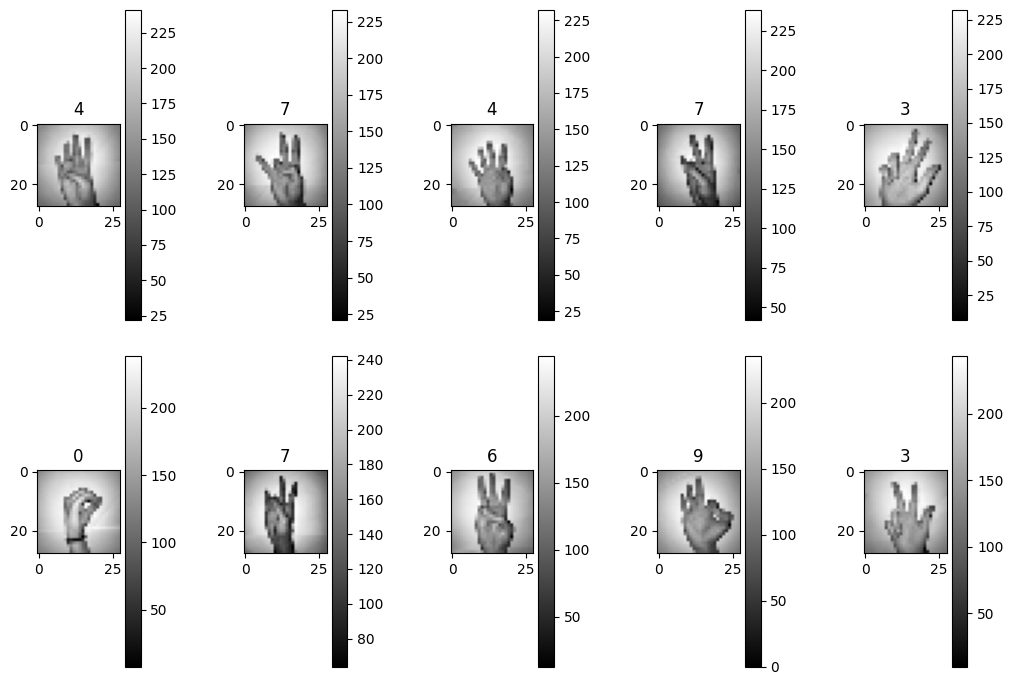

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

plt.figure(figsize=(12,9))
plt.subplots_adjust(wspace=1, hspace=0)                                         #Adjusts the spacing between subplots in the figure
for images, labels in imgdata_train.take(1):                                    #retrieves a batch (take(1)) of images and their corresponding labels
      for i in range(10):                                                       #Loops through the first 10 images and labels in the batch
          print(f'Label: {labels[i].numpy()}, Class Name: {class_names[labels[i].numpy()]}')
          plt.subplot(2, 5, i+1)
          plt.imshow(images[i].numpy().astype('uint8'), cmap='gray')            #Display Images
                                                                                #unit8: convert the pixel values of an image array to an unsigned 8-bit integer format
                                                                                #colormap to gray scale
          plt.title(class_names[labels[i].numpy()])
          plt.colorbar()                                                        #adds colorbar to plots
plt.subplots_adjust
plt.show()

Loading Test Data

In [ ]:
path_test = '/content/drive/MyDrive/IML Project: Sign Language Digits Recognition/Sign Language Dataset/test'            #path of train data directory

img_height = 28                                                                 #resize images from (100px, 100px) to (28px, 28px)
img_width = 28
batch_size = 418

imgdata_test = tf.keras.utils.image_dataset_from_directory(
    path_test,
    labels = 'inferred',                                                        #infers labels from subdirectory
    label_mode = "int",
    class_names = ['0','1','2','3','4','5','6','7','8','9'],
    color_mode = 'grayscale',                                                   #images will be loaded in grayscale mode (single-channel images)
    batch_size = batch_size,
    image_size = (img_height,img_width),
    shuffle = True,
    seed= None
)

Found 418 files belonging to 10 classes.


Converting Test data into Numpy array

In [ ]:
data_iterator = imgdata_test.as_numpy_iterator()                                #Converting TensorFlow data into numpy iterator
batch = data_iterator.next()                                                    #Retrieves the next batch of data from the iterator and store it in batch

# print(type(batch))
print('Number of Arrays in batch Array: ',len(batch))
print('Shape of Image Data: ',batch[0].shape)
# print(batch[0])
print('Labels of images: \n',batch[1])
print('Number os image labels: ',len(batch[1]))

Number of Arrays in batch Array:  2
Shape of Image Data:  (418, 28, 28, 1)
Labels of images: 
 [3 1 4 1 4 5 9 6 2 6 7 2 9 3 0 3 7 1 8 7 0 6 9 9 5 7 6 7 4 9 2 5 5 9 8 4 9
 1 8 6 8 9 0 2 4 7 0 3 9 4 4 4 4 4 8 7 1 1 4 8 7 2 7 5 4 5 8 0 8 3 0 5 8 3
 5 4 5 2 6 2 0 1 8 1 6 3 1 8 3 8 9 4 6 6 2 2 3 8 0 8 2 2 0 5 0 8 5 2 2 1 0
 8 4 6 1 4 6 7 0 9 1 9 9 6 0 6 0 1 9 7 3 4 4 6 7 7 3 9 5 1 1 2 0 1 4 7 1 9
 6 8 4 9 6 7 4 6 0 2 5 3 1 6 5 2 2 8 3 6 3 0 5 8 8 4 3 7 8 1 0 1 8 2 9 1 4
 6 1 4 0 8 9 7 8 2 8 3 2 4 3 7 8 0 5 5 3 6 7 5 5 5 6 5 0 5 7 3 3 2 4 4 2 3
 0 2 6 5 9 4 5 0 6 6 5 2 6 8 3 2 2 8 7 1 8 5 1 9 0 0 6 7 9 7 9 2 4 0 7 1 3
 9 1 8 1 7 5 8 9 8 6 3 7 1 9 7 5 1 4 0 0 9 6 1 0 3 3 4 3 7 2 3 9 9 0 8 6 5
 6 7 7 7 6 9 2 0 8 5 5 6 1 3 5 4 9 2 3 7 7 1 2 4 5 3 3 0 5 6 2 4 0 4 1 6 2
 3 9 4 7 3 3 0 7 1 2 1 2 1 9 2 2 9 8 9 1 5 0 2 8 3 1 3 6 2 2 5 1 6 3 7 9 1
 7 8 3 8 1 8 0 4 9 6 7 2 9 0 7 9 5 5 8 2 4 0 4 3 1 6 6 7 3 9 8 4 0 5 0 9 7
 4 5 3 5 0 6 7 5 6 4 8]
Number os image labels:  418


Lets visualize a set of Test dataset

Label: 1, Class Name: 1
Label: 2, Class Name: 2
Label: 1, Class Name: 1
Label: 0, Class Name: 0
Label: 8, Class Name: 8
Label: 7, Class Name: 7
Label: 8, Class Name: 8
Label: 4, Class Name: 4
Label: 4, Class Name: 4
Label: 9, Class Name: 9


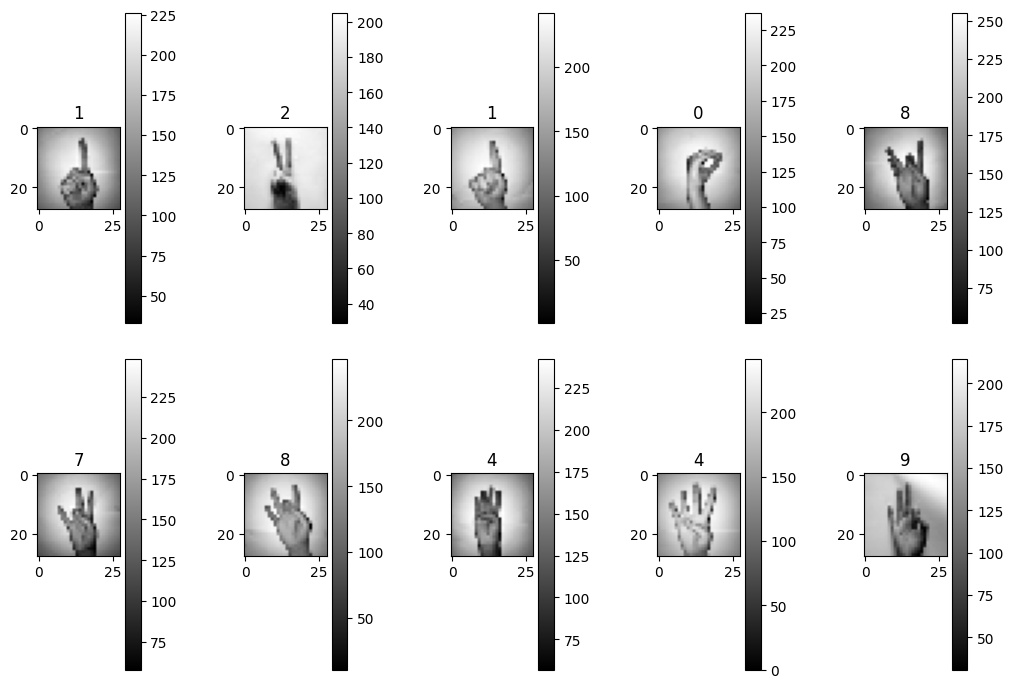

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

plt.figure(figsize=(12,9))
plt.subplots_adjust(wspace=1, hspace=0)                                         #Adjusts the spacing between subplots in the figure
for images, labels in imgdata_test.take(1):                                     #retrieves a batch (take(1)) of images and their corresponding labels
      for i in range(10):                                                       #Loops through the first 10 images and labels in the batch
          print(f'Label: {labels[i].numpy()}, Class Name: {class_names[labels[i].numpy()]}')
          plt.subplot(2, 5, i+1)
          plt.imshow(images[i].numpy().astype('uint8'), cmap='gray')            #Display Images
                                                                                #unit8: convert the pixel values of an image array to an unsigned 8-bit integer format
                                                                                #colormap to gray scale
          plt.title(class_names[labels[i].numpy()])
          plt.colorbar()                                                        #adds colorbar to plots
plt.subplots_adjust
plt.show()

## **Data Normalization**

Normalization of Train data

In [ ]:
imgdata_normalized_train = imgdata_train.map(lambda x, y: (x/255, y))           #applying a mapping function to the dataset imgdata_train
                                                                                #Scale pixel values between 0 and 1  by dividing the image data by 255
                                                                                #lambda creates a function in which y(labels) remain unchanged

data_iterator = imgdata_normalized_train.as_numpy_iterator()                    #Converting TensorFlow data into numpy iterator
batch = data_iterator.next()                                                    #Retrieves the next batch of data from the iterator and store it in batch

print('Number of Arrays in batch Array: ',len(batch))                           #Array contains 2 subarrays
                                                                                #First araay stores image information
                                                                                #Second array stores image labes
print('Shape of Image Data: ',batch[0].shape)
print('Labels of images: \n',batch[1])
print('Number os image labels: ',len(batch[1]))
                                                                                #finding range of pixel intensities present in the images
print('Minimum pixel value: ',batch[0].min())
print('Maximum pixel value: ',batch[0].max())

Number of Arrays in batch Array:  2
Shape of Image Data:  (411, 28, 28, 1)
Labels of images: 
 [7 5 9 7 4 0 1 3 7 9 9 3 6 8 8 8 3 4 9 0 5 5 5 3 4 9 9 5 1 7 4 7 3 1 6 6 4
 6 1 0 9 6 8 8 1 0 9 6 8 9 4 6 1 2 6 8 3 7 7 6 5 8 4 4 8 0 4 6 8 1 9 7 1 8
 2 3 0 0 2 9 5 6 7 5 7 8 7 9 0 4 9 3 1 7 4 5 0 3 3 5 5 9 6 8 5 2 6 7 1 1 4
 1 7 8 6 5 6 0 3 7 5 7 3 8 1 7 6 1 7 3 7 2 9 4 8 8 2 7 0 2 1 4 1 8 0 6 5 0
 3 1 2 5 5 2 4 8 8 3 1 1 3 9 6 5 3 4 6 5 2 9 6 1 8 0 3 2 4 1 7 9 1 9 7 2 1
 6 2 5 9 5 2 6 5 0 1 7 8 5 7 3 0 0 1 5 8 5 0 1 4 2 4 8 9 7 5 6 6 5 9 6 4 2
 0 7 3 3 8 6 1 7 2 7 0 2 5 9 2 1 9 5 2 9 9 0 5 1 0 4 2 4 9 8 1 0 6 9 9 1 4
 8 0 8 4 5 8 9 7 8 8 8 2 5 0 1 8 3 3 4 2 5 4 6 4 5 0 2 0 2 2 1 8 0 8 3 3 6
 6 5 6 2 5 7 0 9 2 4 7 8 2 9 9 0 9 7 9 0 7 5 2 2 9 5 4 3 3 1 3 9 7 2 1 9 7
 0 6 9 4 4 2 6 8 9 5 7 1 5 9 4 6 6 0 6 4 1 1 7 3 4 1 9 1 6 1 4 8 1 5 4 0 0
 3 2 9 4 5 6 5 7 1 7 1 3 4 1 4 0 2 5 2 9 0 4 7 7 1 6 4 9 0 3 7 6 4 5 1 5 6
 5 6 1 6]
Number os image labels:  411
Minimum pixel value:  0.0
Maximum pixel v

Visualization of Normalized Train Data

Label: 8, Class Name: 8
Label: 0, Class Name: 0
Label: 8, Class Name: 8
Label: 8, Class Name: 8
Label: 1, Class Name: 1
Label: 9, Class Name: 9
Label: 6, Class Name: 6
Label: 2, Class Name: 2
Label: 1, Class Name: 1
Label: 5, Class Name: 5


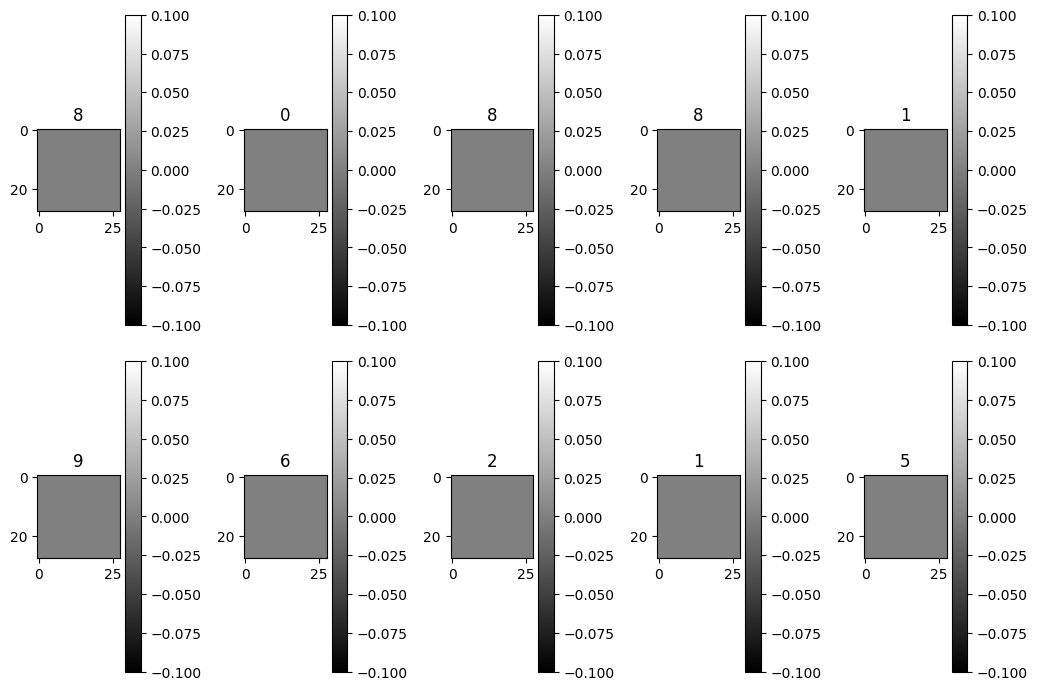

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

plt.figure(figsize=(12,9))
plt.subplots_adjust(wspace=1, hspace=0)                                         #Adjusts the spacing between subplots in the figure
for images, labels in imgdata_normalized_train.take(1):                                    #retrieves a batch (take(1)) of images and their corresponding labels
      for i in range(10):                                                       #Loops through the first 10 images and labels in the batch
          print(f'Label: {labels[i].numpy()}, Class Name: {class_names[labels[i].numpy()]}')
          plt.subplot(2, 5, i+1)
          plt.imshow(images[i].numpy().astype('uint8'), cmap='gray')            #Display Images
                                                                                #unit8: convert the pixel values of an image array to an unsigned 8-bit integer format
                                                                                #colormap to gray scale
          plt.title(class_names[labels[i].numpy()])
          plt.colorbar()                                                        #adds colorbar to plots
plt.subplots_adjust
plt.show()

Normalization of Test Data

In [ ]:
imgdata_normalized_test = imgdata_test.map(lambda x, y: (x/255, y))           #applying a mapping function to the dataset imgdata_test
                                                                                #Scale pixel values between 0 and 1  by dividing the image data by 255
                                                                                #lambda creates a function in which y(labels) remain unchanged

data_iterator = imgdata_normalized_test.as_numpy_iterator()                    #Converting TensorFlow data into numpy iterator
batch = data_iterator.next()                                                    #Retrieves the next batch of data from the iterator and store it in batch

print('Number of Arrays in batch Array: ',len(batch))                           #Array contains 2 subarrays
                                                                                #First araay stores image information
                                                                                #Second array stores image labes
print('Shape of Image Data: ',batch[0].shape)
print('Labels of images: \n',batch[1])
print('Number os image labels: ',len(batch[1]))
                                                                                #finding range of pixel intensities present in the images
print('Minimum pixel value: ',batch[0].min())
print('Maximum pixel value: ',batch[0].max())

Number of Arrays in batch Array:  2
Shape of Image Data:  (418, 28, 28, 1)
Labels of images: 
 [5 4 5 6 5 3 9 9 8 3 0 8 2 3 5 7 6 9 8 2 4 6 5 6 1 6 4 7 0 8 6 8 2 3 1 4 3
 4 4 9 6 6 1 8 7 3 2 3 9 7 5 7 2 0 8 5 5 4 5 8 8 6 8 8 0 7 6 8 0 8 9 1 2 3
 0 3 7 8 9 3 5 3 6 6 3 0 0 4 1 7 9 2 9 7 2 8 4 6 5 6 7 8 6 1 2 7 4 2 5 5 9
 6 4 5 3 9 5 0 1 6 2 6 7 4 9 0 5 9 3 0 4 7 6 5 3 1 5 5 7 0 4 2 0 0 4 0 5 6
 3 6 4 9 2 9 6 4 5 4 9 9 9 9 1 2 8 3 1 2 2 9 9 0 4 1 8 8 2 0 6 2 8 8 8 8 1
 2 8 2 0 4 2 6 7 1 7 4 6 2 7 2 4 3 7 3 7 2 1 3 7 1 8 4 4 1 7 8 6 4 8 6 6 0
 7 3 4 5 1 5 9 9 3 5 0 7 5 7 1 9 1 1 4 9 1 8 2 8 7 7 9 5 3 7 8 3 8 1 2 1 7
 8 5 7 3 9 0 6 7 0 3 8 3 7 4 9 7 7 4 5 1 2 9 2 1 8 3 7 6 5 0 3 5 9 1 0 2 0
 0 2 3 2 0 6 0 1 4 5 7 5 4 2 0 0 3 7 1 0 1 3 4 3 9 3 3 9 5 9 2 8 9 5 6 3 4
 5 4 6 9 2 1 0 5 1 0 8 7 6 6 5 9 3 2 5 8 1 1 6 5 1 2 8 9 9 2 6 0 2 1 1 9 4
 6 3 7 1 2 8 6 7 5 0 5 0 8 9 8 4 7 4 1 1 7 0 3 6 3 0 0 4 6 2 1 5 4 7 3 1 2
 8 0 1 6 4 4 0 2 4 9 3]
Number os image labels:  418
Minimum pixel value:  0.0
M

Visualization of Normalized Test Data

Label: 3, Class Name: 3
Label: 3, Class Name: 3
Label: 7, Class Name: 7
Label: 7, Class Name: 7
Label: 0, Class Name: 0
Label: 4, Class Name: 4
Label: 8, Class Name: 8
Label: 4, Class Name: 4
Label: 4, Class Name: 4
Label: 6, Class Name: 6


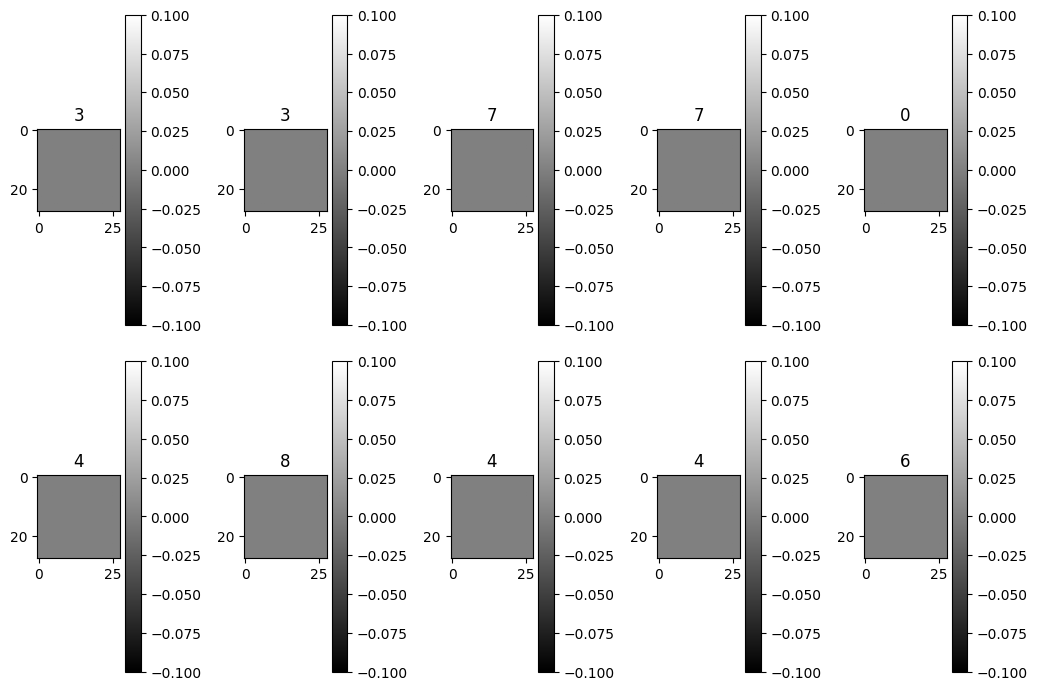

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

plt.figure(figsize=(12,9))
plt.subplots_adjust(wspace=1, hspace=0)                                         #Adjusts the spacing between subplots in the figure
for images, labels in imgdata_normalized_test.take(1):                                    #retrieves a batch (take(1)) of images and their corresponding labels
      for i in range(10):                                                       #Loops through the first 10 images and labels in the batch
          print(f'Label: {labels[i].numpy()}, Class Name: {class_names[labels[i].numpy()]}')
          plt.subplot(2, 5, i+1)
          plt.imshow(images[i].numpy().astype('uint8'), cmap='gray')            #Display Images
                                                                                #unit8: convert the pixel values of an image array to an unsigned 8-bit integer format
                                                                                #colormap to gray scale
          plt.title(class_names[labels[i].numpy()])
          plt.colorbar()                                                        #adds colorbar to plots
plt.subplots_adjust
plt.show()

## **Model: PCA and SVM**

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# we have a TensorFlow dataset, e.g., imgdata_normalized_train
# And now we have to
# Convert TensorFlow dataset to NumPy arrays
data_iterator = imgdata_normalized_train.as_numpy_iterator()
batch = data_iterator.next()
images, labels = batch

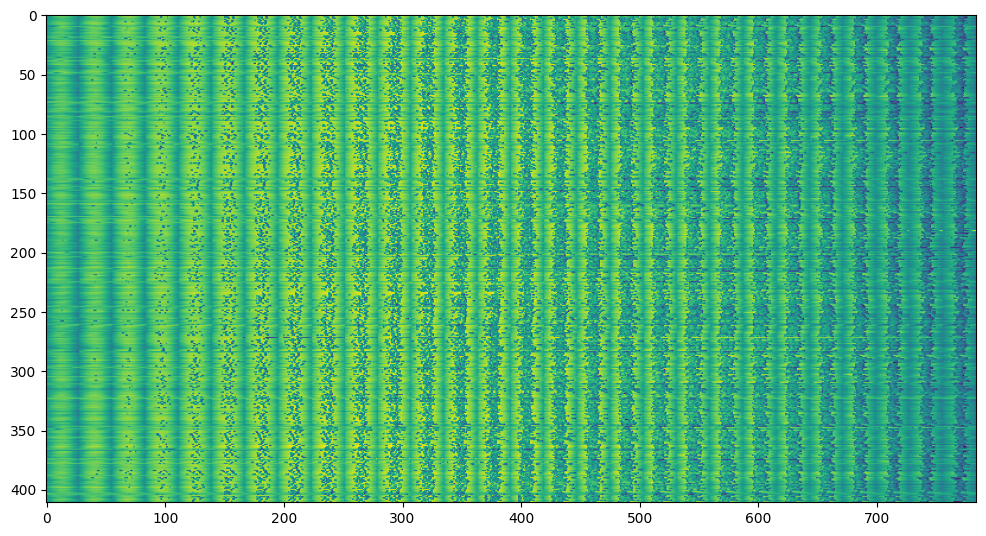

In [ ]:

num_samples, num_features = images.shape[0], np.prod(images.shape[1:])
images_2d = images.reshape(num_samples, num_features)                      # Reshaping the images to a 2D array
plt.figure(figsize=(12,15))
plt.imshow(images_2d)

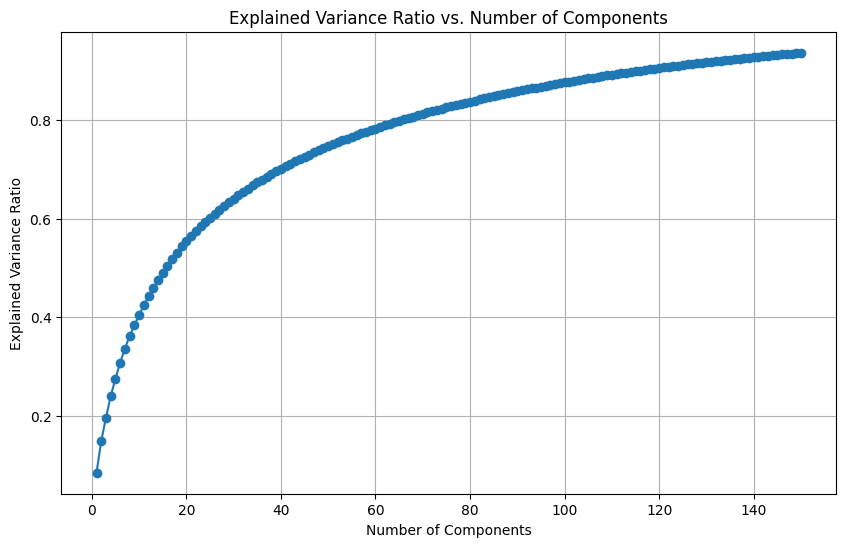

In [ ]:
from sklearn.decomposition import PCA

                             # Calculating PCA for various numbers of components
max_components = 150         # Maximum number of components to test
explained_variances = []

for n in range(1, max_components + 1):
    pca = PCA(n_components=n)
    pca.fit(images_2d)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))


# Plotting the explained variance ratio vs. number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
# Standardize the data
scaler = StandardScaler()
images_standardized = scaler.fit_transform(images_2d)

# Applying PCA
num_components = 140                    # Adjust the number of components as needed
pca = PCA(n_components=num_components)
images_pca = pca.fit_transform(images_standardized)

                                        # Now 'images_pca' contains the principal components of your data


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_pca, labels, test_size=0.2, random_state=42)



svm_classifier = SVC()            # Initializing a Support Vector Machine (SVM) classifier

hist=svm_classifier.fit(X_train, y_train)        # Training the classifier on the training data

predictions = svm_classifier.predict(X_test)      # Making predictions on the test data

accuracy = accuracy_score(y_test, predictions)    # accuracy of the classifier
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 48.19%


In [ ]:
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Convert the TensorFlow dataset to NumPy arrays
test_iterator = imgdata_normalized_test.as_numpy_iterator()
test_batch = test_iterator.next()
test_images, test_labels = test_batch

# Reshape the images
num_samples_test, num_features_test = test_images.shape[0], np.prod(test_images.shape[1:])
test_images_2d = test_images.reshape(num_samples_test, num_features_test)

# Standardize the test data using the same scaler used for training
test_images_standardized = scaler.transform(test_images_2d)  # Assuming 'scaler' is your trained StandardScaler

# Apply PCA to reduce dimensionality
test_images_pca = pca.transform(test_images_standardized)

# Make predictions using the SVM classifier
predictions_svm = svm_classifier.predict(test_images_pca)

# Evaluate the accuracy on the test data (if ground truth labels are available)
accuracy = accuracy_score(test_labels, predictions_svm)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")


Accuracy on test data: 52.15%


In [ ]:
test_labels       #Original labels

array([5, 8, 5, 8, 1, 3, 6, 8, 6, 2, 7, 7, 9, 7, 0, 8, 5, 3, 0, 3, 2, 5,
       5, 0, 3, 2, 6, 1, 6, 0, 8, 0, 4, 0, 6, 1, 9, 0, 8, 1, 3, 6, 8, 7,
       3, 3, 1, 5, 1, 7, 4, 0, 7, 7, 2, 0, 4, 7, 9, 1, 3, 0, 0, 0, 6, 2,
       2, 4, 1, 3, 0, 2, 4, 5, 4, 9, 7, 6, 3, 5, 6, 6, 9, 5, 9, 3, 8, 9,
       3, 5, 5, 1, 6, 9, 7, 8, 1, 2, 8, 5, 1, 7, 3, 5, 4, 8, 4, 1, 6, 4,
       5, 1, 7, 1, 8, 1, 3, 2, 8, 2, 8, 2, 8, 9, 3, 1, 3, 0, 2, 1, 2, 9,
       0, 6, 2, 8, 7, 3, 5, 5, 7, 8, 2, 8, 1, 7, 6, 2, 6, 5, 0, 5, 3, 7,
       6, 7, 2, 1, 4, 5, 3, 3, 5, 8, 0, 9, 2, 6, 9, 1, 8, 0, 7, 3, 6, 6,
       9, 0, 2, 0, 4, 3, 9, 6, 7, 8, 0, 9, 8, 2, 0, 5, 7, 9, 4, 2, 1, 5,
       0, 7, 2, 6, 4, 5, 9, 0, 5, 0, 0, 9, 7, 3, 0, 7, 4, 2, 4, 2, 1, 4,
       5, 3, 3, 6, 2, 7, 8, 0, 7, 3, 7, 6, 8, 1, 4, 6, 2, 7, 2, 1, 9, 3,
       5, 5, 4, 6, 0, 1, 4, 9, 0, 9, 6, 2, 4, 9, 8, 0, 9, 1, 1, 7, 2, 5,
       5, 8, 9, 0, 9, 0, 7, 1, 8, 6, 6, 8, 2, 6, 3, 9, 1, 9, 4, 4, 2, 6,
       8, 3, 4, 5, 4, 4, 4, 5, 1, 9, 9, 6, 2, 6, 1,

In [ ]:
predictions_svm      #predicted labels

array([5, 8, 9, 4, 7, 3, 6, 8, 6, 1, 7, 7, 4, 7, 5, 8, 9, 2, 0, 5, 4, 5,
       5, 0, 6, 1, 7, 1, 1, 0, 8, 7, 7, 0, 4, 1, 5, 0, 4, 1, 3, 4, 8, 7,
       3, 3, 9, 5, 7, 4, 4, 0, 1, 1, 2, 0, 4, 7, 8, 1, 3, 0, 0, 0, 6, 2,
       1, 7, 1, 3, 0, 7, 4, 9, 4, 8, 7, 0, 3, 5, 6, 4, 9, 5, 9, 3, 4, 7,
       3, 5, 9, 1, 8, 7, 4, 7, 4, 6, 7, 5, 1, 2, 3, 9, 7, 8, 7, 1, 7, 4,
       5, 1, 7, 1, 8, 1, 5, 1, 7, 7, 8, 1, 7, 2, 3, 1, 3, 7, 7, 1, 7, 9,
       7, 7, 6, 5, 1, 3, 5, 5, 7, 1, 2, 8, 1, 7, 6, 1, 4, 5, 0, 5, 1, 7,
       1, 7, 1, 1, 7, 5, 1, 3, 5, 7, 4, 5, 2, 4, 9, 1, 8, 4, 7, 3, 8, 7,
       9, 0, 2, 7, 4, 3, 9, 7, 5, 8, 1, 9, 4, 7, 8, 5, 7, 9, 4, 1, 1, 5,
       0, 7, 7, 4, 2, 1, 9, 0, 5, 9, 0, 9, 2, 3, 0, 4, 4, 2, 8, 2, 1, 7,
       5, 9, 3, 7, 1, 0, 4, 7, 7, 3, 7, 6, 4, 1, 7, 1, 2, 4, 8, 1, 8, 1,
       5, 4, 7, 2, 7, 1, 9, 9, 0, 9, 7, 2, 7, 5, 8, 0, 9, 1, 1, 7, 1, 4,
       5, 4, 9, 0, 7, 0, 5, 1, 7, 4, 7, 8, 7, 2, 3, 9, 8, 9, 7, 7, 2, 6,
       7, 3, 9, 5, 7, 7, 4, 5, 1, 9, 9, 6, 6, 4, 1,

## **Train Test Validation Split for CNN**



*   We have total 1644 images in training data so divided them into 4 batches(each batch contain 411 images)
*   Test data contains 418 images so used all data in single batch



In [ ]:
print('Number of Batches in Train Datasat: ',len(imgdata_normalized_train))
print('Number of Batches in Test Datasat: ',len(imgdata_normalized_test))

Number of Batches in Train Datasat:  4
Number of Batches in Test Datasat:  1


Lets do Train-Validation split on train data in Ratio 75:25

In [ ]:
train_size = int(len(imgdata_normalized_train)*0.75)                            #75% of Trained Normalized data will be used as train data
print('Number of Batches in Train Datasat: ',train_size)
val_size = int(len(imgdata_normalized_train)*0.25)                              #25% of Trained Normalized data will be used as test data
print('Number of Batches in Valodation Datasat: ',val_size)
test_size = int(len(imgdata_normalized_test)*1)
print('Number of Batches in Test Datasat: ',test_size)

Number of Batches in Train Datasat:  3
Number of Batches in Valodation Datasat:  1
Number of Batches in Test Datasat:  1


In [ ]:
train_size+val_size+test_size

5

In [ ]:
train = imgdata_normalized_train.take(train_size)
print('Number of Batches in Train Datasat: ',len(train))
val = imgdata_normalized_train.skip(train_size).take(val_size)
print('Number of Batches in Validation Datasat: ',len(val))
test = imgdata_normalized_test.take(test_size)
print('Number of Batches in Test Datasat: ',len(test))

Number of Batches in Train Datasat:  3
Number of Batches in Validation Datasat:  1
Number of Batches in Test Datasat:  1


## **CNN Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()                                                            #initialize an empty Sequential model

Model Architecture

In [ ]:
# Convolutional layers are designed to extract hierarchical features from the input images while reducing spatial dimensions
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))       #adds a convolutional layer with 32 filters each filter having a size of 3x3
model.add(MaxPooling2D((2, 2)))                        #adds a max-pooling layer with a pool size of 2x2 reducing the spatial dimensions of the data

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())                                                            #flattens the output into a 1D array

model.add(Dense(128, activation='relu'))                                        # fully connected layer with 128 neurons and uses the ReLU activation function
model.add(Dense(10, activation='softmax'))             #final fully connected layer consists of 10 neurons, representing the output classes (digits 0 to 9)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#loss function measures how well model performs by calculating the cross-entropy between the predicted probability distribution and the true probability distribution of the classes

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

Training data on CNN Model

In [ ]:
logdir = 'logs'                                                                 #specifies the directory where the TensorBoard logs will be stored
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)           #callback will store data like loss, metrics, and model graphs in the specified directory
# print(tensorboard_callback)
hist = model.fit(imgdata_normalized_train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
4/4 [==============================] - 7s 1s/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.2977 - val_accuracy: 0.1168
Epoch 2/100
4/4 [==============================] - 6s 1s/step - loss: 2.2968 - accuracy: 0.1101 - val_loss: 2.2912 - val_accuracy: 0.1119
Epoch 3/100
4/4 [==============================] - 5s 1s/step - loss: 2.2906 - accuracy: 0.1010 - val_loss: 2.2844 - val_accuracy: 0.1825
Epoch 4/100
4/4 [==============================] - 5s 1s/step - loss: 2.2784 - accuracy: 0.2822 - val_loss: 2.2704 - val_accuracy: 0.3236
Epoch 5/100
4/4 [==============================] - 7s 1s/step - loss: 2.2589 - accuracy: 0.3169 - val_loss: 2.2413 - val_accuracy: 0.3017
Epoch 6/100
4/4 [==============================] - 5s 921ms/step - loss: 2.2286 - accuracy: 0.3400 - val_loss: 2.2102 - val_accuracy: 0.3552
Epoch 7/100
4/4 [==============================] - 5s 1s/step - loss: 2.1795 - accuracy: 0.4197 - val_loss: 2.1351 - val_accuracy: 0.4526
Epoch 8/100
4/4 [==============

Visualize the training and validation loss over epochs during the model training process

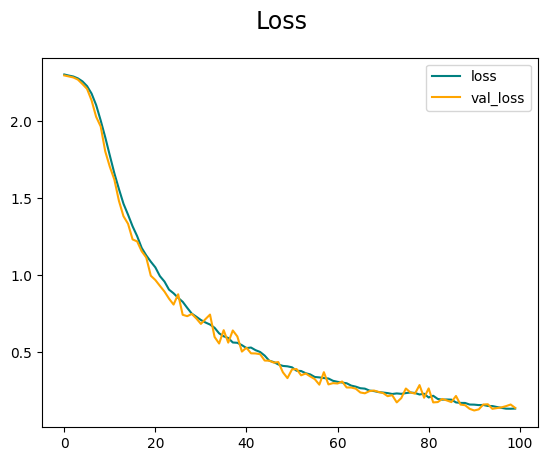

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')                  #plt training loss values logged during the training process
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')        #plt training validation loss values logged during the training process
fig.suptitle('Loss', fontsize = 17)
plt.legend(loc = 'upper right')
plt.show()

Visualize the training and validation accuracy over epochs during the model training process

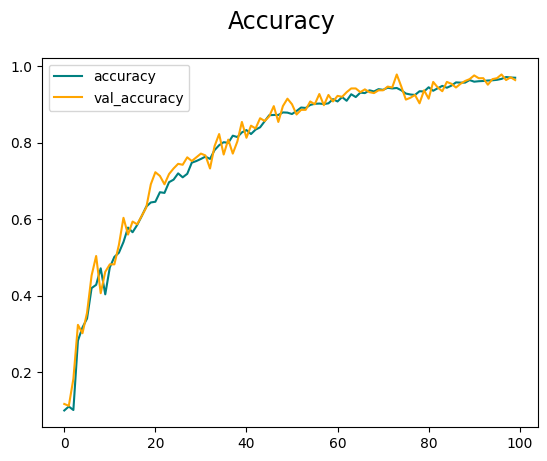

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')                #plt training accuracy values logged during the training process
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')      #plt training validation accuracy values logged during the training process
fig.suptitle('Accuracy', fontsize = 17)
plt.legend(loc = 'upper left')
plt.show()

## **Model Evaluation and Prediction**

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
predictions = probability_model.predict(imgdata_normalized_test)

1/1 [==============================] - 1s 772ms/step


In [ ]:
#Prediction is an array of 10 numbers. Each element represents the confidance that the image corresponds to the each of the 10 different classes
predictions[0]

array([0.08642994, 0.08642993, 0.08642993, 0.08642993, 0.08643167,
       0.08643037, 0.08642993, 0.08643027, 0.21341167, 0.09514635],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

8

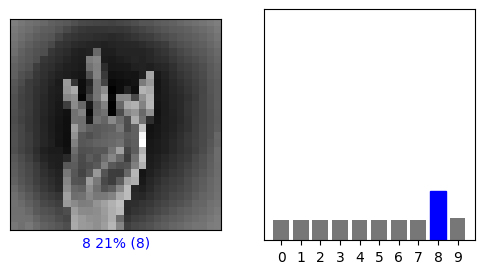

In [ ]:
for images, labels in imgdata_normalized_test.take(1):
  i = 0
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], labels, images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  labels)
  plt.show()